In [1]:
%load_ext autoreload
%autoreload 2

In [127]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.cm as cm
    
import sys 
sys.path.insert(0, '../mcmc/src/')
import jsm_SHMR

from astropy.table import Table
import os
import warnings; warnings.simplefilter('ignore')
from matplotlib.colors import PowerNorm
import matplotlib.image as mpimg


sys.path.insert(0, '../../SatGen/src/')
import galhalo

In [3]:
halo_masses = np.linspace(8,12,100) # just for the model

In [4]:
mass_example = np.load("../../data/MW-analog/meta_data_psi4/models.npz")["mass"]
red_example = np.load("../../data/MW-analog/meta_data_psi4/models.npz")["redshift"]

In [5]:
mass_example = np.vstack(mass_example)

red_example = np.vstack(red_example)

In [6]:
def redshift(theta, lgMh_2D, z_2D):

    """_summary_
    Convert from halo mass to stellar mass with scatter in Ms
    Now Ms* is based on z_acc

    Args:
        lgMh_2D (np.ndarray): 2D halo mass array
        theta_0: power law slope 
        theta_1: log normal scatter
        theta_2: the stellar mass anchor point
        theta_3: quadratic term to curve the relation
        theta_4: slope of scatter as function of log halo mass
        theta_5: the strength of the redshift dependance on the stellar mass anchor point

    Returns:
        np.ndarray: 2D stellar mass array
    """

    M_star_a = theta[2] * (1+z_2D)**theta[5]
    M_halo_a = 12

    Mhalo = lgMh_2D - M_halo_a

    sigma = theta[1] + theta[4]*(Mhalo)
    sigma[sigma < 0] = theta[1]

    lgMs_2D = theta[0]*(Mhalo) + theta[3]*(Mhalo)**2 + M_star_a
    scatter_2D = np.random.normal(loc=0, scale=sigma, size=(lgMs_2D.shape))
    return lgMs_2D + scatter_2D

In [25]:
N = 200

binH = np.linspace(8,12,N)
binS = np.linspace(2,10,N)

In [110]:
def plot_SHMR_dist(theta, theta_det):

    stellar_example = redshift(theta, mass_example, red_example)

    flat_H = mass_example.flatten()
    flat_S = stellar_example.flatten()
    nanmask = ~np.isnan(flat_H)

    galhalo.lgMs_RP17(halo_masses, 0)

    plt.figure(figsize=(8, 6))
    plt.title(label="$\\theta$ = "+str(theta))
    plt.hist2d(flat_H[nanmask], flat_S[nanmask], bins=(binH, binS), norm=PowerNorm(gamma=0.2), cmap="Blues")
    plt.plot(halo_masses, redshift(theta_det, halo_masses,0), color="black", label="< log m$_{*}$ > ", lw=2)
    plt.plot(halo_masses, galhalo.lgMs_B13(halo_masses, 0), color="orange", ls="--", label="Behroozi 2013", lw=2)
    plt.plot(halo_masses, galhalo.lgMs_RP17(halo_masses, 0), color="red", ls="--", label="Rodriguez+Puebla 2017", lw=2)
    plt.ylabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
    plt.xlabel("log m$_{\mathrm{peak}}$ (M$_\odot$)", fontsize=15)
    plt.legend()
    plt.show()

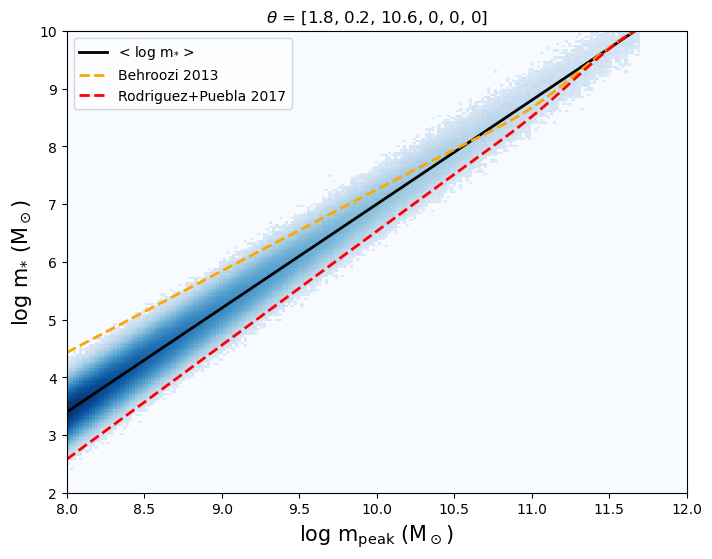

In [111]:
theta = [1.8, 0.2, 10.6, 0, 0, 0]

theta_det = [1.8, 0, 10.6, 0, 0, 0]

plot_SHMR_dist(theta, theta_det)

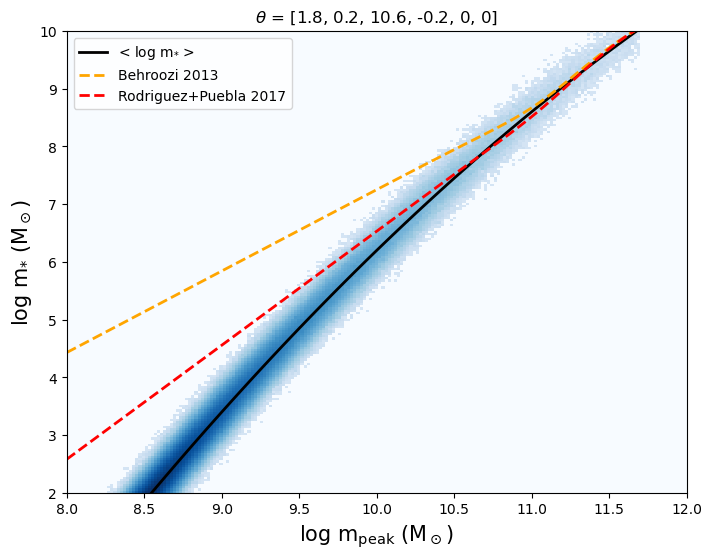

In [112]:
theta = [1.8, 0.2, 10.6, -0.2, 0, 0]

theta_det = [1.8, 0, 10.6, -0.2, 0, 0]

plot_SHMR_dist(theta, theta_det)

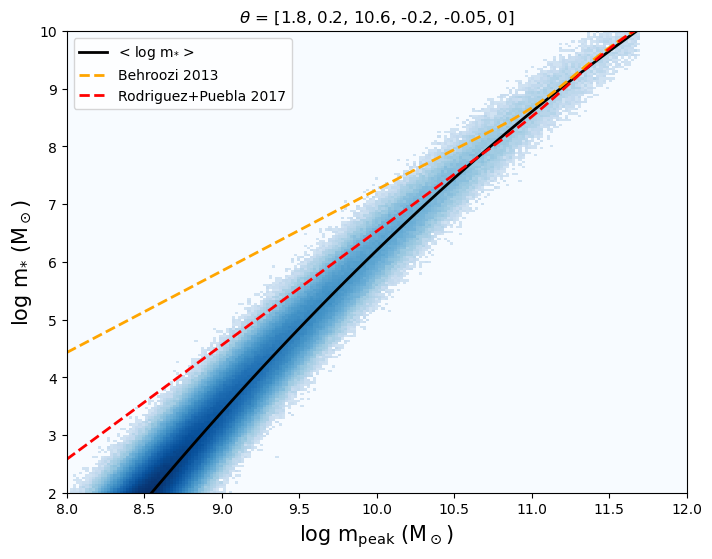

In [113]:
theta = [1.8, 0.2, 10.6, -0.2, -0.05, 0]

theta_det = [1.8, 0, 10.6, -0.2, 0, 0]

plot_SHMR_dist(theta, theta_det)

In [121]:
theta = [1.8, 0.2, 10.6, -0.2, -0.05, 0.05]

theta_det = [1.8, 0, 10.6, -0.2, 0, 0.05]

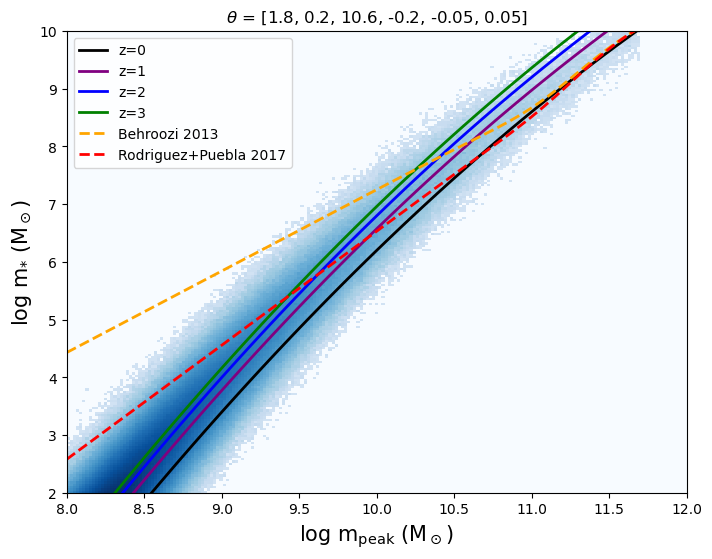

In [126]:
stellar_example = redshift(theta, mass_example, red_example)

flat_H = mass_example.flatten()
flat_S = stellar_example.flatten()
nanmask = ~np.isnan(flat_H)

galhalo.lgMs_RP17(halo_masses, 0)

plt.figure(figsize=(8, 6))
plt.title(label="$\\theta$ = "+str(theta))

plt.hist2d(flat_H[nanmask], flat_S[nanmask], bins=(binH, binS), norm=PowerNorm(gamma=0.2), cmap="Blues")
plt.plot(halo_masses, redshift(theta_det, halo_masses, 0), color="black", label="z=0", lw=2)
plt.plot(halo_masses, redshift(theta_det, halo_masses, 1), color="purple", label="z=1", lw=2)
plt.plot(halo_masses, redshift(theta_det, halo_masses, 2), color="blue", label="z=2", lw=2)
plt.plot(halo_masses, redshift(theta_det, halo_masses, 3), color="green", label="z=3", lw=2)
plt.plot(halo_masses, galhalo.lgMs_B13(halo_masses, 0), color="orange", ls="--", label="Behroozi 2013", lw=2)
plt.plot(halo_masses, galhalo.lgMs_RP17(halo_masses, 0), color="red", ls="--", label="Rodriguez+Puebla 2017", lw=2)
plt.ylabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
plt.xlabel("log m$_{\mathrm{peak}}$ (M$_\odot$)", fontsize=15)
plt.legend()
plt.show()

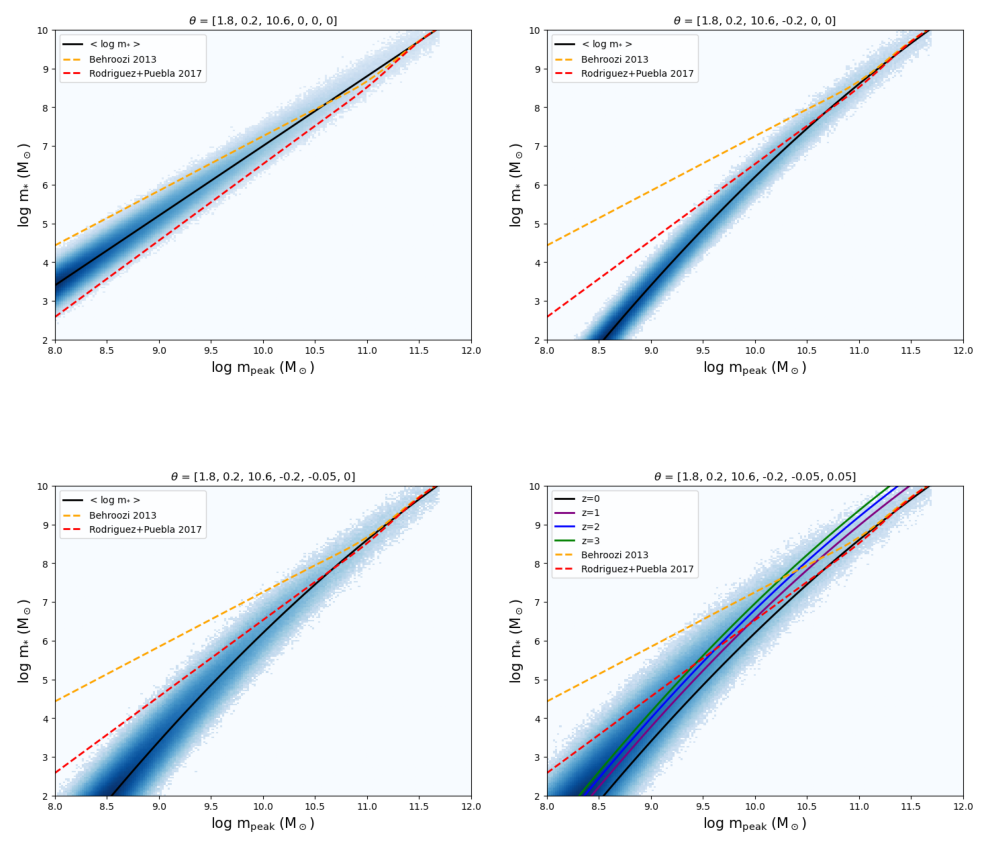

In [131]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def create_2x2_grid(images):
    fig, axs = plt.subplots(2, 2, figsize=(10,10))

    for i in range(2):
        for j in range(2):
            img = mpimg.imread(images[i * 2 + j])
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
    plt.tight_layout()
    plt.show()

datadir = "../mcmc/figures/paper/"

if __name__ == "__main__":
    # Replace these file paths with your own PNG files
    image_paths = [datadir+"complex1.png", datadir+"complex2.png", datadir+"complex3.png", datadir+"complex4.png"]

    create_2x2_grid(image_paths)


------------------------------
------------------------------
------------------------------


$\log_{10} (M_{*}) = \log_{10} (\epsilon M_{1})+ \alpha \log_{10} (M_{peak}) - \alpha \log_{10}(M_1)$

$ M_{*} = \epsilon M_{1} \left( \frac{M_{peak}}{M_1} \right)^{\alpha}$

$ M_{*} = \left( \epsilon M_{1}^{1-\alpha} \right) \left( M_{peak} \right)^{\alpha} $

$\log_{10} (M_{*}) = \alpha \log_{10} (M_{peak}) + \log_{10}\left( \epsilon M_{1}^{1-\alpha} \right)$

$y = mx + b$, where $a$ is the slope, and $b$ the intercept, is a function of the slope and the normalization 



------------------------------




$\sigma(M_{peak}) = \sigma_0 + \gamma \left( \log_{10} (M_{peak}) − \log_{10}( M_1 ) \right)$ for the increasing scatter!

In [ ]:
def dex(value):
    
    #10^(0.1) = 0.1 dex
    
    return 10**(value)

In [ ]:
def single_samp(lgMv, dex):

    log_e = -1.5
    a = 1.82
    lgMs = log_e + 12.5 + a*lgMv - a*12.5
    scatter = np.random.normal(loc=0, scale=dex, size=(lgMs.shape[0])) # the standard normal PDF
    return (lgMs + scatter)- (dex**2)/4.605

In [ ]:
halo_masses = np.log10(np.logspace(7, 14, 100)) # just for the model

stellar_masses = galhalo.lgMs_D22(halo_masses) 

stellar_masses_15 = single_samp(halo_masses, 0.1) 

stellar_masses_5 = single_samp(halo_masses, 0.5) 

stellar_masses_2 = single_samp(halo_masses, 1) 

In [ ]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses, color="black", label="deterministic")

plt.plot(halo_masses, stellar_masses_2, label="1 dex scatter")
plt.plot(halo_masses, stellar_masses_5, label="0.5 dex scatter")
plt.plot(halo_masses, stellar_masses_15, label="0.1 dex scatter")


plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()
#plt.savefig("../figures/SHMR_scatter.png")
plt.show()

In [ ]:
stellar_masses_RP = galhalo.lgMs_RP17(halo_masses, 0)
stellar_masses_B = galhalo.lgMs_B13(halo_masses,0)

stellar_masses_RP_1 = galhalo.lgMs_RP17(halo_masses, 0.5)
stellar_masses_B_1 = galhalo.lgMs_B13(halo_masses,0.5)

stellar_masses_RP_2 = galhalo.lgMs_RP17(halo_masses, 1)
stellar_masses_B_2 = galhalo.lgMs_B13(halo_masses,1)

stellar_masses_RP_3 = galhalo.lgMs_RP17(halo_masses, 1.5)
stellar_masses_B_3 = galhalo.lgMs_B13(halo_masses,1.5)

stellar_masses_RP_4 = galhalo.lgMs_RP17(halo_masses, 2)
stellar_masses_B_4 = galhalo.lgMs_B13(halo_masses,2)

In [ ]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses_RP, label="Rodriguez+Puebla 2017", lw=4)
plt.plot(halo_masses, stellar_masses, label="Danieli 2022", lw=4)
plt.plot(halo_masses, stellar_masses_B, label="Behroozi 2013", lw=4)

plt.ylabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
plt.xlabel("log m$_{\mathrm{h}}$ (M$_\odot$)", fontsize=15)
plt.legend(fontsize=15)
plt.axvline(12, color="grey", ls="--")
plt.axhline(10.5, color="grey", ls="--")

plt.show()

In [ ]:
dM = 0.1

dMs_dM_B = np.gradient(galhalo.lgMs_B13(halo_masses,0), dM)
dMs_dM_RP = np.gradient(galhalo.lgMs_RP17(halo_masses,0), dM)

In [ ]:
plt.plot(halo_masses, dMs_dM_B)
plt.plot(halo_masses, dMs_dM_RP)
plt.axvline(12, color="grey", ls="--")
plt.show()

In [ ]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses_B, label="z=0", color="red")
plt.plot(halo_masses, stellar_masses_B_1, label="z=0.5", color="red", ls=":")
plt.plot(halo_masses, stellar_masses_B_2, label="z=1", color="red", ls="--")
plt.plot(halo_masses, stellar_masses_B_3, label="z=1.5", color="red", ls="-.")

plt.plot(halo_masses, stellar_masses_RP, label="z=0", color="green")
plt.plot(halo_masses, stellar_masses_RP_1, label="z=0.5", color="green", ls=":")
plt.plot(halo_masses, stellar_masses_RP_2, label="z=1", color="green", ls="--")
plt.plot(halo_masses, stellar_masses_RP_3, label="z=1.5", color="green", ls="-.")

plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()

plt.show()

In [ ]:
# def master_SHMR_1D(lgMh, alpha=1.82, delta=0, sigma=None, N_samples=1000, GK_norm=False, beta_norm=False):

#     """_summary_

#     a flexible Stellar to Halo Mass Relation that has a few tricks up its sleeve
#     Returns:
#         numpy array: stellar masses!
#     """

#     M_star_a = 10 # these are the anchor points
#     M_halo_a = 11.67

#     if sigma != None:
#         print("randomly sampling the lognormal PDF", N_samples, "times")

#         if GK_norm == True:
#             alpha_norm = 0.14*sigma**2 + 0.14*sigma+ 1.79
#             lgMs = alpha_norm*(lgMh-M_halo_a)  - delta*(lgMh-M_halo_a)**2 + M_star_a
#             scatter = np.random.normal(loc=0, scale=sigma, size=(N_samples, lgMs.shape[0]))
#             return lgMs + scatter
        
#         if beta_norm == True:
#             lgMs = alpha*(lgMh-M_halo_a) - delta*(lgMh-M_halo_a)**2 + M_star_a
#             scatter = np.random.normal(loc=0, scale=sigma, size=(N_samples, lgMs.shape[0]))
#             return lgMs + scatter - (sigma**2)/4.605
        
#         else:
#             print("not normalizing for the upscatter")
#             lgMs = alpha*(lgMh-M_halo_a) - delta*(lgMh-M_halo_a)**2 + M_star_a
#             scatter = np.random.normal(loc=0, scale=sigma, size=(N_samples, lgMs.shape[0]))
#             return lgMs + scatter

#     else:
#         print("assuming a deterministic SHMR")
#         lgMs = alpha*(lgMh-M_halo_a) - delta*(lgMh-M_halo_a)**2 + M_star_a
#         return lgMs

σ(Mpeak) = σ0 + ν(log10 Mpeak − log10 M1)

In [ ]:
def SHMR(lgMh, p):
    M_star_a = p[4]
    M_halo_a = 11.67

    M_halo_a = 11.67
    sigma = p[2] + p[3]*(lgMh - M_halo_a)

    lgMs = p[0]*(lgMh-M_halo_a) + p[1]*(lgMh-M_halo_a)**2 + M_star_a
    scatter = np.random.normal(loc=0, scale=sigma, size=(lgMs.shape))
    return lgMs + scatter

In [ ]:
plt.title("Rodriquez-Puebla et al. 2017")

plt.plot(np.linspace(0,6,100), galhalo.lgMs_RP17(12, z=np.linspace(0,6,100)), label="log Mv = 12")
plt.plot(np.linspace(0,6,100), galhalo.lgMs_RP17(11, z=np.linspace(0,6,100)), label="log Mv = 11")
plt.plot(np.linspace(0,6,100), galhalo.lgMs_RP17(10, z=np.linspace(0,6,100)), label="log Mv = 10")
plt.plot(np.linspace(0,6,100), galhalo.lgMs_RP17(9, z=np.linspace(0,6,100)), label="log Mv = 9")
plt.plot(np.linspace(0,6,100), galhalo.lgMs_RP17(8, z=np.linspace(0,6,100)), label="log Mv = 8")

plt.ylabel("log Mstellar")
plt.xlabel("redshift")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
plt.title("Behroozi et al. 2013")

plt.plot(np.linspace(0,6,100), galhalo.lgMs_B13(12, z=np.linspace(0,6,100)), label="log Mv = 12")
plt.plot(np.linspace(0,6,100), galhalo.lgMs_B13(11, z=np.linspace(0,6,100)), label="log Mv = 11")
plt.plot(np.linspace(0,6,100), galhalo.lgMs_B13(10, z=np.linspace(0,6,100)), label="log Mv = 10")
plt.plot(np.linspace(0,6,100), galhalo.lgMs_B13(9, z=np.linspace(0,6,100)), label="log Mv = 9")
plt.plot(np.linspace(0,6,100), galhalo.lgMs_B13(8, z=np.linspace(0,6,100)), label="log Mv = 8")

plt.ylabel("log Mstellar")
plt.xlabel("redshift")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
lgMh = np.linspace(8,13,20)

In [ ]:
lgMs = []
for i in np.linspace(-2,2,5):
    lgMs_i = 0.25 + i*(lgMh - 12)
    plt.plot(lgMh, lgMs_i, label=str(i))
plt.axhline(0,ls="--")
plt.legend()

### playing with redshift?

In [ ]:
mass_example = np.load("../../data/MW-analog/meta_data_psi3/models.npz")["mass"][0:2]
red_example = np.load("../../data/MW-analog/meta_data_psi3/models.npz")["redshift"][0:2]

In [ ]:
# theta_0: power law slope 
# theta_1: log normal scatter
# theta_2: the stellar mass anchor point
# theta_3: quadratic term to curve the relation
# theta_4: slope of the scatter as function of log halo mass
# theta_5: the strength of the redshift dependance on the stellar mass anchor point

In [ ]:
theta = [2, 0, 10, -0.2, -0.1, 0.1]

In [ ]:
simple = jsm_SHMR.simple(theta[0:2], mass_example).flatten()

anchor = jsm_SHMR.anchor(theta[0:3], mass_example).flatten()

curve = jsm_SHMR.curve(theta[0:4], mass_example).flatten()

sigma = jsm_SHMR.sigma(theta[0:5], mass_example).flatten()

redshift = jsm_SHMR.redshift(theta[0:6], mass_example, red_example).flatten()

In [ ]:
plt.scatter(mass_example.flatten(), redshift, marker=".")
plt.scatter(mass_example.flatten(), sigma, marker=".")
plt.scatter(mass_example.flatten(), curve, marker=".")
plt.scatter(mass_example.flatten(), anchor, marker=".")
plt.scatter(mass_example.flatten(), simple, marker=".")
# plt.plot(mass_example.flatten(), galhalo.lgMs_B13(mass_example.flatten()), color="black")
# plt.plot(mass_example.flatten(), galhalo.lgMs_RP17(mass_example.flatten()), color="black")

plt.show()

In [ ]:
import time

start_time = time.monotonic()

simple = jsm_SHMR.simple(theta[0:2], mass_example)

print('seconds: ', time.monotonic() - start_time)

In [ ]:
start_time = time.monotonic()

anchor = jsm_SHMR.anchor(theta[0:3], mass_example)

print('seconds: ', time.monotonic() - start_time)

In [ ]:
start_time = time.monotonic()

curve = jsm_SHMR.curve(theta[0:4], mass_example)

print('seconds: ', time.monotonic() - start_time)

In [ ]:
start_time = time.monotonic()

sigma = jsm_SHMR.sigma(theta[0:5], mass_example)

print('seconds: ', time.monotonic() - start_time)

In [ ]:
start_time = time.monotonic()

redshift = jsm_SHMR.redshift(theta[0:6], mass_example, red_example)

print('seconds: ', time.monotonic() - start_time)

In [ ]:
stop[]

In [ ]:
def SHMR(lgMh, p):
    M_star_a = 10
    M_halo_a = 11.67

    lgMs = p[0]*(lgMh-M_halo_a) + p[1]*(lgMh-M_halo_a)**2 + M_star_a
    scatter = np.random.normal(loc=0, scale=p[2], size=(lgMs.shape))
    return lgMs + scatter

In [ ]:
halo_masses = np.linspace(8,12,100)

In [ ]:
plt.plot(halo_masses, SHMR.sigmaGrow([1.95, -0.2, 0.1, -0.4], halo_masses))
plt.plot(halo_masses, galhalo.lgMs_B13(halo_masses, 0))
plt.plot(halo_masses, galhalo.lgMs_RP17(halo_masses, 0))
plt.ylim(2,11)

In [ ]:
a3 = np.linspace(0,1,100)
a4 = np.linspace(-3,0,100)

M_halo_a = 11.67

sigma = a3 + (-1)*(11 - M_halo_a)

In [ ]:
lgMh = np.linspace(8,12,100)

In [ ]:
sigma = 0.1 + (-0.3)*(lgMh - 11.67)
plt.scatter(lgMh, sigma)
plt.axhline(0, color="red")
plt.show()

In [ ]:
a3 = np.linspace(0,1,100)
a4 = np.linspace(-3,0,100)

image = np.empty(shape=(100,100))
for i in range(100):
    for j in range(100):
        sigma = a3[i] + (a4[j])*(8 - 11.67)
        image[i,j] = sigma

In [ ]:
plt.imshow(image)
plt.colorbar()

In [ ]:
samples = np.load("../../data/init_val/start9/samples.npy")

In [ ]:
def SHMR_plot(self, data, SHMR):

    self.halo_masses = np.log10(np.logspace(6, 13, 100)) # just for the model

    SHMR_mat = np.zeros(shape=(self.last_samp.shape[0], self.halo_masses.shape[0]))
    sigmas = self.last_samp[:,2]
    norm = mpl.colors.Normalize(vmin=sigmas.min(), vmax=sigmas.max())
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.viridis_r)
    colors = mpl.cm.viridis_r(np.linspace(0, 1, len(sigmas)))


    a1, a2, a3, a4 = self.truths[0], self.truths[1], 0, self.truths[3] # just to define the fiducial model
    self.fid_Ms = SHMR([a1, a2, a3, a4], self.halo_masses)

    for i,val in enumerate(self.last_samp):  # now pushing all thetas through!
        a1, a2, a3, a4 = val[0], val[1], 0, val[3]
        lgMs = SHMR([a1, a2, a3, a4], self.halo_masses)
        SHMR_mat[i] = lgMs

    plt.figure(figsize=(10, 8))
    for i in SHMR_mat:
        plt.plot(self.halo_masses, i, color=colors[i], lw=1)
    plt.plot(self.halo_masses, galhalo.lgMs_B13(self.halo_masses), color="red", label="Behroozi et al. 2013", ls="--", lw=2)
    plt.plot(self.halo_masses, galhalo.lgMs_RP17(self.halo_masses), color="navy", label="Rodriguez-Puebla et al. 2017", ls="--", lw=2)
    plt.plot(self.halo_masses, self.fid_Ms, color="black", label=str(self.truths), lw=2)

    dp = data.get_data_points(min_mass=self.min_mass)
    plt.scatter(dp[0], dp[1], marker="*", color="black")

    plt.ylim(4,11)
    plt.xlim(7.5,12)
    plt.ylabel("M$_{*}$ (M$_\odot$)", fontsize=15)
    plt.xlabel("M$_{\mathrm{vir}}$ (M$_\odot$)", fontsize=15)
    plt.legend(fontsize=12)
    plt.savefig(self.savedir+"SHMR.png")